<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

## Intoducción

En este ejercicio compararemos varios modelos de "ensamblado" para un problema de clasificación.

**Debes generar en cada celda de código una celda de texto que explique lo que se hace e interpretar los resultados (métricas) cuando corresponda.
Finalmente, generar una CONCLUSION con tu análisis. Comparando y justificando en forma adecuada, cual fue el mejor modelo aplicado en este caso.**

Para ello utilizaremos el dataset de  Estabilidad de una Matriz Eléctrica.


https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

La estabilidad en una matriz energética del país es de suma importancia para el progreso economico y el bienestar de sus habitantes (solo tener presente la sensación de inseguridad, malestar, etc. que se puede generar con un corte no previsto puede afectar el mercado económico y el bienestar de una población)

El desafio es tratar de determinar si la red es estable (columna ```stabf```) basado en un conjunto de caracteristicas disponibles:


1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable)


Estos datos fueron usados en el paper: "Towards Concise Models of Grid Stability"



## Antes de empezar modelar

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

X = df.drop(['stab','stabf'],axis=1)
Y = df['stabf']

In [ ]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [ ]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


*texto en cursiva*## Bagging

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)
mo = DecisionTreeClassifier()
model = BaggingClassifier(mo, n_estimators=10)

params = {"base_estimator__max_depth": [2,3],
          "max_samples": [0.1,0.2],
          "base_estimator__min_samples_split": [2,3,4]}
grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_est

In [ ]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.8095000000000001
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 3, 'max_samples': 0.1}


In [ ]:
Y.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

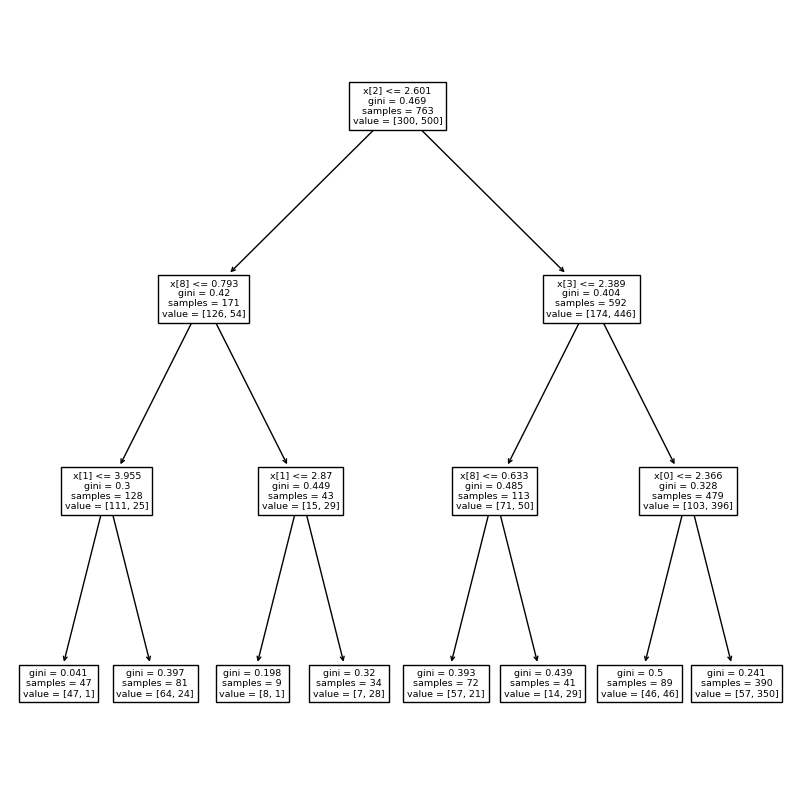

In [ ]:
# Visualizamos 1 sólo árbol dentro del "bosque" generado por Bagging
import matplotlib.pyplot as plt
from sklearn import tree

mo_ = grid.best_estimator_.estimators_[0]
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo_)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 373  369]
 [  62 1196]]
              precision    recall  f1-score   support

      stable       0.86      0.50      0.63       742
    unstable       0.76      0.95      0.85      1258

    accuracy                           0.78      2000
   macro avg       0.81      0.73      0.74      2000
weighted avg       0.80      0.78      0.77      2000



In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: stabf
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


**Usar otra función de scoring/loss para elegir el "mejor" modelo**



*   Funciones pre-definidas:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

*   Funciones personalizadas:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='accuracy')
grid.fit(Xtrain, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_est

GridSearchCV(cv=10,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [2, 3],
                         'base_estimator__min_samples_split': [2, 3, 4],
                         'max_samples': [0.1, 0.2]},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8084999999999999
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 4, 'max_samples': 0.1}


In [ ]:
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                                                       0.066011
std_fit_time                                                                        0.004342
mean_score_time                                                                     0.006029
std_score_time                                                                      0.001258
param_base_estimator__max_depth                                                            3
param_base_estimator__min_samples_split                                                    4
param_max_samples                                                                        0.1
params                                     {'base_estimator__max_depth': 3, 'base_estimat...
split0_test_score                                                                    0.80375
split1_test_score                                                                    0.83625
split2_test_score                                                     

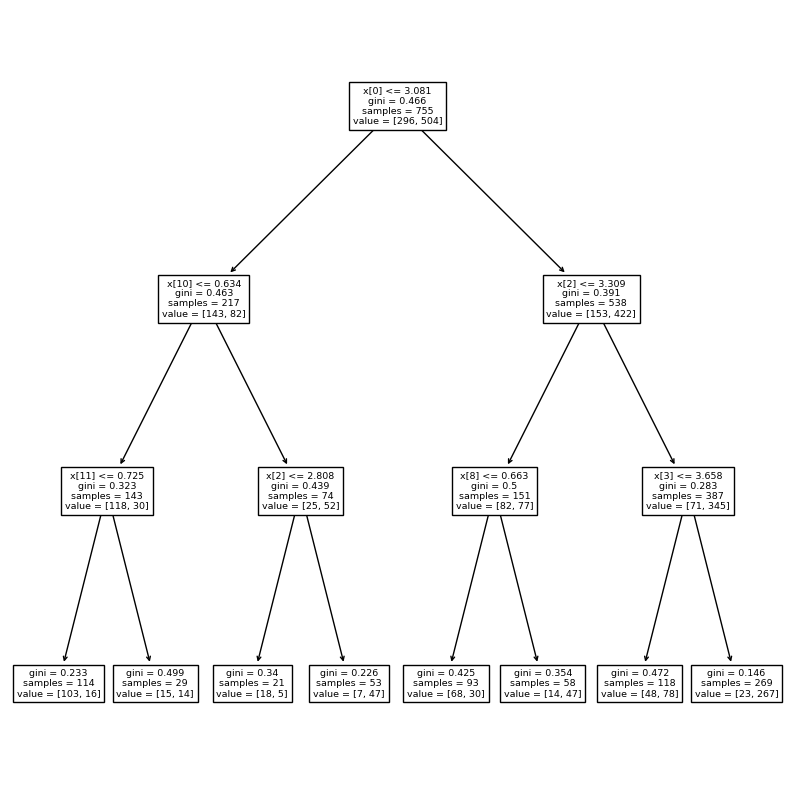

In [ ]:
# Visualizamos el árbol ganador!
import matplotlib.pyplot as plt
from sklearn import tree

mo_ = grid.best_estimator_.estimators_[0]
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo_)

##RandomForest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

model = RandomForestClassifier()

params = {"n_estimators": [10],
          "max_depth": [2,3],
          "min_samples_split": [2,3,4],
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.7738749999999999
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 3, 'n_estimators': 10}


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 288  420]
 [  43 1249]]
              precision    recall  f1-score   support

      stable       0.87      0.41      0.55       708
    unstable       0.75      0.97      0.84      1292

    accuracy                           0.77      2000
   macro avg       0.81      0.69      0.70      2000
weighted avg       0.79      0.77      0.74      2000



##AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

mo = DecisionTreeClassifier()
model = AdaBoostClassifier(mo)

params = {"n_estimators": [10],
          "base_estimator__max_depth": [2,3],
          "base_estimator__min_samples_split": [2,3,4],
          "base_estimator__max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.8905000000000001
{'base_estimator__max_depth': 3, 'base_estimator__max_leaf_nodes': 8, 'base_estimator__min_samples_split': 2, 'n_estimators': 10}


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 576  138]
 [  84 1202]]
              precision    recall  f1-score   support

      stable       0.87      0.81      0.84       714
    unstable       0.90      0.93      0.92      1286

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.89      0.89      0.89      2000



##Gradient Boosting

**INVESTIGA Y EXPLICA como funciona este modelo**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

model = GradientBoostingClassifier()

params = {"n_estimators": [10],
          "max_depth": [2,3],
          "min_samples_split": [2,3,4],
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.773375
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 302  437]
 [  11 1250]]
              precision    recall  f1-score   support

      stable       0.96      0.41      0.57       739
    unstable       0.74      0.99      0.85      1261

    accuracy                           0.78      2000
   macro avg       0.85      0.70      0.71      2000
weighted avg       0.82      0.78      0.75      2000

